Accuracy Score: 1.0

Confusion Matrix:
 [[1499    0]
 [   0  501]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1499
           1       1.00      1.00      1.00       501

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



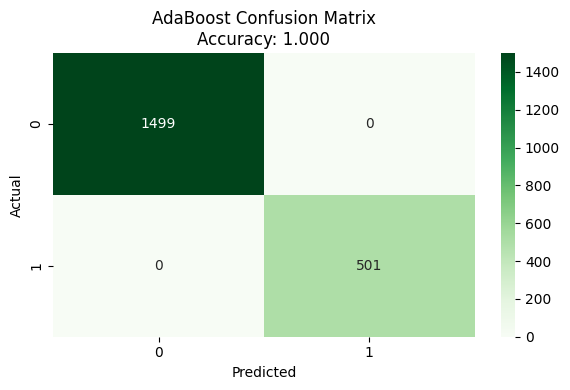

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fixed.csv").sample(n=10000, random_state=42)

df = df[['Year', 'Month', 'Number of Mentions', 'COVID-19 Deaths',
         'State', 'Age Group', 'Condition Group']]
df = pd.get_dummies(df, columns=['State', 'Age Group', 'Condition Group'])

threshold = df['COVID-19 Deaths'].median()
df['High_Death'] = (df['COVID-19 Deaths'] > threshold).astype(int)
df.drop(columns='COVID-19 Deaths', inplace=True)

X = df.drop(columns='High_Death')
y = df['High_Death']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)
adaboost.fit(X_train_scaled, y_train)

y_pred = adaboost.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f"AdaBoost Confusion Matrix\nAccuracy: {accuracy_score(y_test, y_pred):.3f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("adaboost_conf_matrix.png")
plt.show()



Training Data Before Scaling:
        Year  Month  Number of Mentions  State_Alabama  State_Alaska  \
442067  2022      9                 0.0          False         False   
164615  2020      6                 0.0          False         False   
176502  2021      1                 0.0          False         False   
313621  2021      5                 0.0          False         False   
45852   2020      1                16.0          False         False   

        State_Arizona  State_Arkansas  State_California  State_Colorado  \
442067          False           False             False           False   
164615          False           False             False           False   
176502          False           False             False           False   
313621          False           False             False           False   
45852           False           False             False           False   

        State_Connecticut  ...  Condition Group_COVID-19  \
442067              False

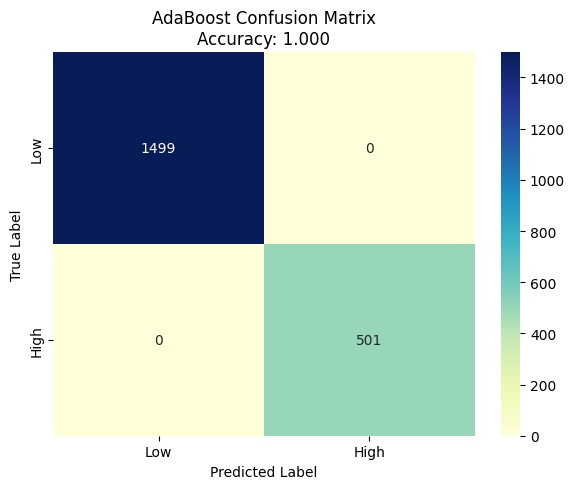

In [ ]:

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_df.head().to_csv("X_train_before_scaling.csv", index=False)
X_test_df.head().to_csv("X_test_before_scaling.csv", index=False)
X_train_scaled_df.head().to_csv("X_train_after_scaling.csv", index=False)
X_test_scaled_df.head().to_csv("X_test_after_scaling.csv", index=False)

print("\nTraining Data Before Scaling:")
print(X_train_df.head())

print("\nTesting Data Before Scaling:")
print(X_test_df.head())

print("\nTraining Data After Scaling:")
print(X_train_scaled_df.head())

print("\nTesting Data After Scaling:")
print(X_test_scaled_df.head())

from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title(f"AdaBoost Confusion Matrix\nAccuracy: {acc:.3f}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("adaboost_conf_matrix_labeled.png")
plt.show()
